In [1]:
from semcor_bert_utils import *

In [2]:
semcor_reader = SemCorSelector()
model = initialize_model()

# Material Item Polysemy

## Glass

In [3]:
semcor_reader.get_word_data('glass')

In [4]:
semcor_reader.get_senses_for_curr_word()

Senses for word glass


{('n', '01'), ('n', '02'), ('n', '03'), None}

In [5]:
sel_senses = [('n', '01'), ('n', '02'), ('n', '03')]
glass_sentences, glass_trees, glass_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 21
Number of sentences for sense ('n', '02') 10
Number of sentences for sense ('n', '03') 4


In [6]:
glass_raw_embeddings = get_raw_embeddings('glass', glass_sentences, model)
glass_summed_embeds = process_raw_embeddings(glass_raw_embeddings, 4, sum_layers)


In [9]:
def plot_embeddings(e, sense_indices, sense_names, word_name):
    assert len(sense_indices) == len(sense_names)
    as_arr = np.asarray([t.numpy() for t in e])
    dim_red = TSNE()
    tsne_results = dim_red.fit_transform(as_arr)
    num_senses = len(sense_indices)
    results_for_sense = []

    results_for_sense.append(tsne_results[:sense_indices[0] - 1])
    for i in np.arange(len(sense_indices) - 1):
        start = sense_indices[i]
        end = sense_indices[i + 1]
        results_for_sense.append(tsne_results[start:end])
    
    sense_dict = {}
    for i in range(num_senses):
        if i == 2:
            plt.scatter(results_for_sense[i][:,0], results_for_sense[i][:,1], label = sense_names[i], color = 'purple')
        else:
            plt.scatter(results_for_sense[i][:,0], results_for_sense[i][:,1], label = sense_names[i])
        sense_dict[sense_names[i]] = results_for_sense[i]

    plt.title("BERT Embeddings for Senses of the Word \"" + word_name + "\" ")
    plt.legend()
    return sense_dict


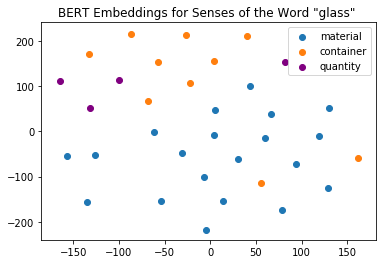

In [16]:
glass_results = plot_embeddings(glass_summed_embeds,
                                glass_indices, ['material', 'container', 'quantity'], 'glass')

In [22]:
[i for i in np.arange(len(glass_results['container'])) if glass_results['container'][i][0] >= 50]

[1, 4]

In [25]:
glass_indices

[21, 31, 35]

In [27]:
glass_sentences[22]

'The suburban branch is thereby credited with a sale which would have been made even if its glass doors had never opened .'

In [30]:
glass_sentences[25]

'There was a glass pane in the front door , and through this he could see into a hallway where a plump woman with red hair was arranging flowers .'

In [36]:
glass_sentences.insert(0, glass_sentences[22])


In [37]:
glass_sentences.insert(0, glass_sentences[26])

In [41]:
glass_sentences[24]

'The suburban branch is thereby credited with a sale which would have been made even if its glass doors had never opened .'

In [43]:
glass_sentences[27]

'There was a glass pane in the front door , and through this he could see into a hallway where a plump woman with red hair was arranging flowers .'

In [40]:
glass_sentences[:2]

['There was a glass pane in the front door , and through this he could see into a hallway where a plump woman with red hair was arranging flowers .',
 'The suburban branch is thereby credited with a sale which would have been made even if its glass doors had never opened .']

In [46]:
del glass_sentences[24:28:3]

In [57]:
glass_sentences[30]

'Two men murmured with their heads together at the end of the bar , while the sleek headed bartender absently polished a glass .'

In [58]:
len(glass_sentences)

35

In [59]:
glass_indices = [23, 31, 35]

In [60]:
glass_raw_embeddings = get_raw_embeddings('glass', glass_sentences, model)
glass_summed_embeds = process_raw_embeddings(glass_raw_embeddings, 4, sum_layers)


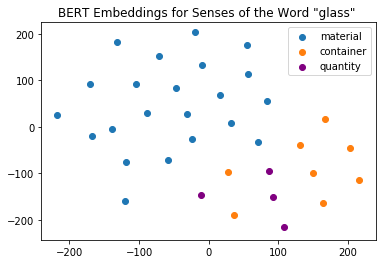

In [61]:
glass_results = plot_embeddings(glass_summed_embeds,
                                glass_indices, ['material', 'container', 'quantity'], 'glass')

In [64]:
def find_closest_distance(e1_lst, e2_lst):
    return np.mean([min([euc_dist(e1, e2) for e2 in e2_lst]) for e1 in e1_lst])



In [65]:
def centroid(arr):
    arr = lst_to_np(arr)
    length, dim = arr.shape
    return np.array([np.sum(arr[:, i])/length for i in range(dim)])


In [66]:
def lst_to_np(arr):
    return np.array([t.numpy() for t in arr])

In [67]:
material_orig = glass_summed_embeds[:glass_indices[0]]
cntr_orig = glass_summed_embeds[glass_indices[0]:glass_indices[1]]
quant_orig = glass_summed_embeds[glass_indices[1]:glass_indices[2]]

In [68]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [69]:
def cs_centroids(s1, s2):
    return cosine_sim(centroid(s1), centroid(s2))

In [70]:
def dist_centroids(s1, s2):
    return euc_dist(centroid(s1), centroid(s2))

In [89]:
dist_centroids(material_orig, cntr_orig)

49.920660023562

In [90]:
dist_centroids(cntr_orig, quant_orig)

28.723487090539177

In [91]:
dist_centroids(material_orig, quant_orig)

55.19707240246716

Cosine Similarity

In [71]:
cs_centroids(material_orig, cntr_orig)

0.6464858189334435

In [72]:
cs_centroids(cntr_orig, quant_orig)

0.897841636248237

In [73]:
cs_centroids(material_orig, quant_orig)

0.5958294515148661

## Linen

In [26]:
semcor_reader.get_word_data('linen')

In [27]:
semcor_reader.get_senses_for_curr_word()

Senses for word linen


{('n', '01'), ('n', '02'), None}

In [28]:
sel_senses = [('n', '01'), ('n', '02')]
linen_sentences, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 2
Number of sentences for sense ('n', '02') 1


In [30]:
[i.definition() for i in nltk.corpus.wordnet.synsets('linen')]

['a fabric woven with fibers from the flax plant',
 'a high-quality paper made of linen fibers or with a linen finish',
 'white goods or clothing made with linen cloth']

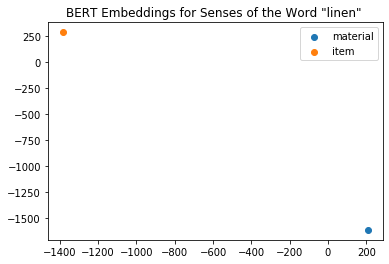

In [32]:
linen_raw_embeddings = get_raw_embeddings('linen', linen_sentences, model)
linen_summed_embeds = process_raw_embeddings(linen_raw_embeddings, 4, sum_layers)
plot_embeddings(linen_summed_embeds, sense_indices, ['material', 'item'], 'linen')

## Iron

In [34]:
semcor_reader.get_word_data('iron')
semcor_reader.get_senses_for_curr_word()

Senses for word iron


{('n', '01'), ('n', '02'), ('v', '01'), None}

In [1]:
type(('n', '01'))

tuple

In [37]:
sel_senses = [('n', '01'), ('n', '02')]
iron_sentences, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 16
Number of sentences for sense ('n', '02') 1


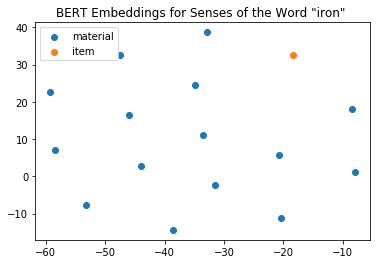

In [40]:
iron_raw_embeddings = get_raw_embeddings('iron', iron_sentences, model)
iron_summed_embeds = process_raw_embeddings(iron_raw_embeddings, 4, sum_layers)
plot_embeddings(iron_summed_embeds, sense_indices, ['material', 'item'], 'iron')

## Nickel

In [57]:
semcor_reader.get_word_data('nickel')
semcor_reader.get_senses_for_curr_word()

Senses for word nickel


{('n', '01'), ('n', '02')}

In [62]:
sel_senses = [('n', '01'), ('n', '02')]
nickel_senses, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 4
Number of sentences for sense ('n', '02') 1


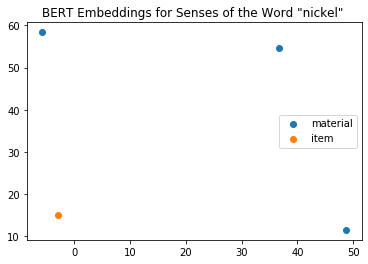

In [63]:
nickel_raw_embeddings = get_raw_embeddings('nickel', nickel_senses, model)
nickel_summed_embeds = process_raw_embeddings(nickel_raw_embeddings, 4, sum_layers)
plot_embeddings(iron_summed_embeds, sense_indices, ['material', 'item'], 'nickel')

# Visualizing Embeddings for Most Frequently Occurring Words in SEMCOR

## Use

In [95]:
semcor_reader.get_word_data('use')

In [96]:
semcor_reader.get_senses_for_curr_word()

Senses for word use


{('n', '01'),
 ('n', '02'),
 ('n', '03'),
 ('v', '00'),
 ('v', '01'),
 ('v', '02'),
 ('v', '03'),
 ('v', '05'),
 None}

In [100]:
sel_senses = [('n', '01'), ('v', '01')]
use_sentences, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 85
Number of sentences for sense ('v', '01') 140


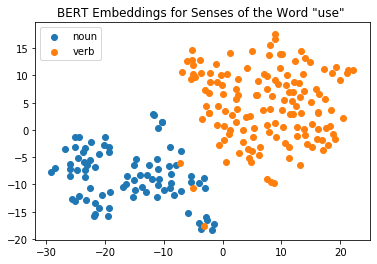

In [104]:
use_raw = get_raw_embeddings('use', use_sentences, model)
use_summed = process_raw_embeddings(use_raw, 4, sum_layers)
plot_embeddings(use_summed, sense_indices, ['noun', 'verb'], 'use')

## Left

In [75]:
semcor_reader.get_word_data('left')

In [76]:
semcor_reader.get_senses_for_curr_word()

Senses for word left


{('a', '01'),
 ('n', '01'),
 ('n', '02'),
 ('n', '03'),
 ('r', '01'),
 ('s', '01'),
 ('s', '03'),
 ('v', '00'),
 ('v', '01'),
 ('v', '02'),
 ('v', '03'),
 ('v', '04'),
 ('v', '06'),
 ('v', '07'),
 ('v', '08'),
 ('v', '11'),
 ('v', '12'),
 None}

In [77]:
sel_senses = [('n', '01'),
 ('n', '02'),
 ('n', '03')]
left_sentences, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 19
Number of sentences for sense ('n', '02') 1
Number of sentences for sense ('n', '03') 8


ValueError: too many values to unpack (expected 2)

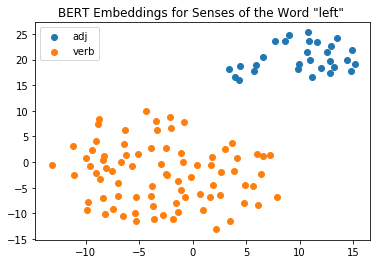

In [137]:
left_raw = get_raw_embeddings('left', left_sentences, model)
left_summed = process_raw_embeddings(left_raw, 4, sum_layers)
plot_embeddings(left_summed, sense_indices, ['adj', 'verb'], 'left')

## Right

In [21]:
semcor_reader.get_word_data('right')

In [22]:
semcor_reader.get_senses_for_curr_word()

Senses for word right


{('a', '01'),
 ('a', '04'),
 ('a', '05'),
 ('a', '4;3'),
 ('n', '01'),
 ('n', '02'),
 ('n', '04'),
 ('n', '05'),
 ('n', '06'),
 ('r', '01'),
 ('r', '02'),
 ('r', '03'),
 ('r', '04'),
 ('r', '06'),
 ('r', '07'),
 ('s', '01'),
 ('s', '02'),
 ('s', '04'),
 None}

In [23]:
sel_senses = [('n', '01'),
 ('n', '02')]
right_sentences, right_tagged, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 33
Number of sentences for sense ('n', '02') 12


In [24]:
right_raw = get_raw_embeddings('right', right_sentences, model)
right_summed = process_raw_embeddings(right_raw, 4, sum_layers)

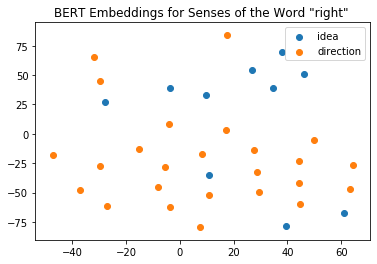

In [40]:
right_results = plot_embeddings(right_summed, sense_indices, ['idea', 'direction'], 'right')

## Table

In [6]:
semcor_reader.get_word_data('table')
semcor_reader.get_senses_for_curr_word()

Senses for word table


{('n', '01'), ('n', '02'), ('n', '03'), None}

In [7]:
nltk.corpus.wordnet.synsets('table')[0].definition()

'a set of data arranged in rows and columns'

In [47]:
sel_senses = [('n', '01'), ('n', '02'), ('n', '03')]
tbl_sentences, tbl_tagged, sense_indices = semcor_reader.get_selected_sense_sents(sel_senses)

Number of sentences for sense ('n', '01') 11
Number of sentences for sense ('n', '02') 25
Number of sentences for sense ('n', '03') 4


In [48]:
sel_senses

[('n', '01'), ('n', '02'), ('n', '03')]

In [49]:
sense_indices

[11, 36, 40]

In [50]:
tree_labels = []
this_sense_indices = [0] + sense_indices
for i in np.arange(len(sense_indices)):
    start = this_sense_indices[i]
    end = this_sense_indices[i + 1]
    tree_labels += (end - start) * [sel_senses[i]]


In [51]:
sense_indices[-1]

40

In [53]:
len(tree_labels) == len(tbl_sentences)

True

In [9]:
tbl_raw = get_raw_embeddings('table', tbl_sentences, model)
tbl_summed = process_raw_embeddings(tbl_raw, 4, sum_layers)

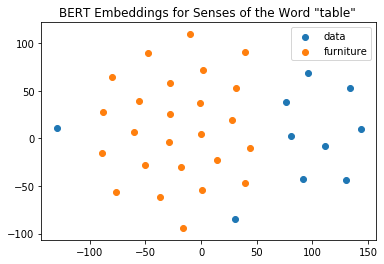

In [10]:
tbl_results = plot_embeddings(tbl_summed, sense_indices, ['data', 'furniture'], 'table')

In [11]:
second = tbl_summed.pop(2)
tbl_summed.append(second)

In [81]:
sense_indices[0] -= 1

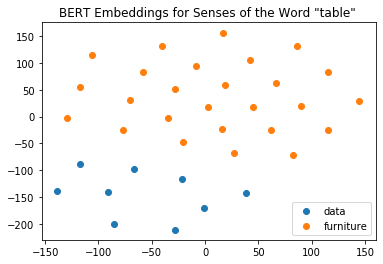

In [82]:
tbl_results = plot_embeddings(tbl_summed, sense_indices, ['data', 'furniture'], 'table')

In [83]:
sense_indices

[10, 36]

In [84]:
data_embeds = tbl_summed[:sense_indices[0]]
furn_embeds = tbl_summed[sense_indices[0]:sense_indices[1]]

In [85]:
find_closest_distance(data_embeds, furn_embeds)

72.635185

In [86]:
dist_centroids(data_embeds, furn_embeds)

58.10873736089385

In [88]:
cs_centroids(data_embeds, furn_embeds)

0.5416212893501905

Getting data from SEMCOR
Senses for word table
Getting sentences for relevant senses
Number of sentences for sense ('n', '01') 11
Number of sentences for sense ('n', '02') 25
Generating BERT embeddings
Plotting t-SNE


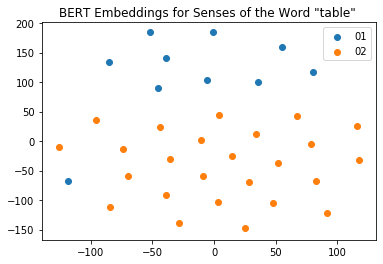

In [4]:
tbl_embeds, tbl_tsne = run_pipeline('table', 'n', model, plot = True)

In [5]:
tree_labels = sense_indices[0] * [sel_senses[0]]
for i in np.arange(len(sense_indices) - 1):
    start = sense_indices[i]
    end = sense_indices[i + 1]
    tree_labels += (end - start) * [sel_senses[i]]


NameError: name 'sense_indices' is not defined